# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

metter eil viriale dove si calcola l'energia potenziale


### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

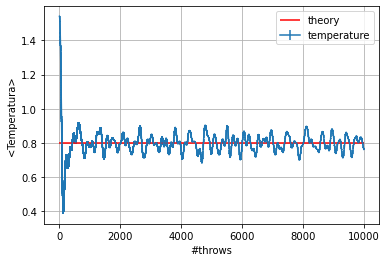

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
x,s,err = np.loadtxt("../Lezione4/data/outputeq_temp_solid.dat", usecols=(0,1,3), unpack='true')

plt.errorbar(x,s,yerr=err,label="temperature")
plt.hlines(0.8,0,10000,color ="red",label="theory")
plt.xlabel('#throws')
plt.ylabel('<Temperatura>')
plt.legend()
plt.grid(True)
plt.show()


After 2k throws the Temperature same to be equilibrate. Actually, average temperature and theory temperature, after tk throws is under 1%.
I set the temperature to equilibrate equal at 1.5414

In [2]:
abs(np.mean(s[2000:])-0.8)

0.001250587999999997

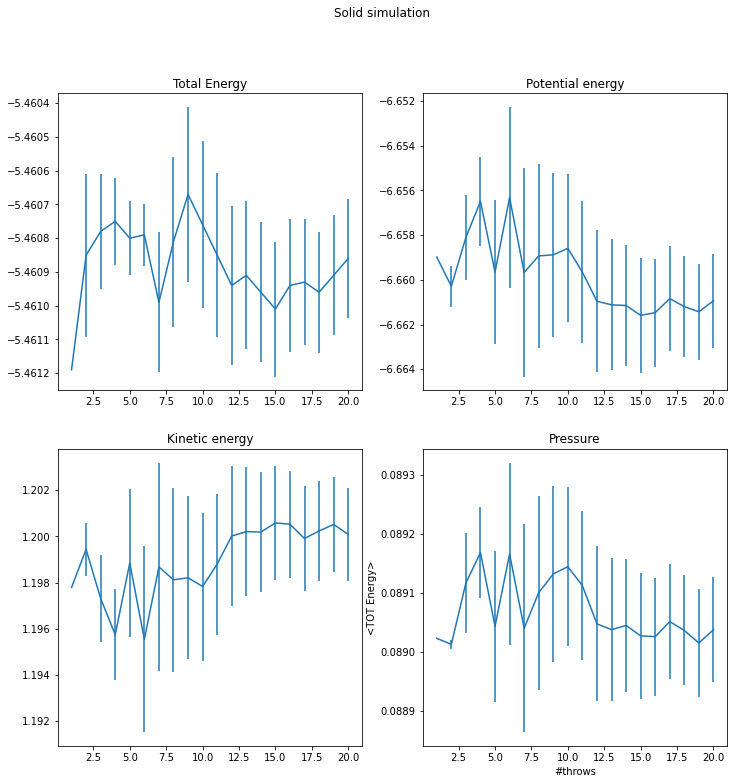

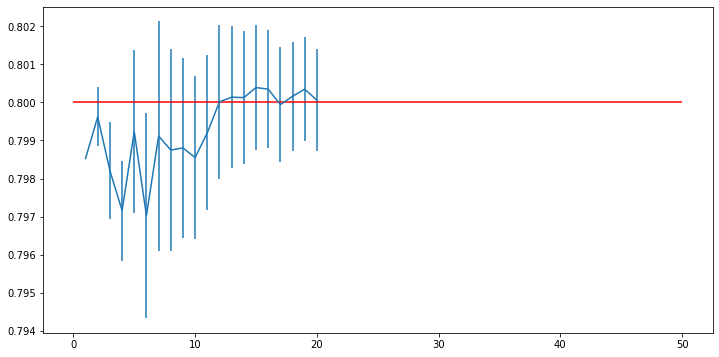

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


In [3]:
file_name =["etot","epot","ekin","pres","temp"]
labels = ["Total Energy","Potential energy","Kinetic energy","Pressure","Temperature"]
fig, axs = plt.subplots(2, 2,figsize=(12,12))

x = []; s = []; err = []
for count in range(5):
    xt,st,errt = np.loadtxt(f"../Lezione4/data/output_{file_name[count]}_solid.dat", usecols=(0,2,3), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.errorbar(x[count],s[count],yerr=err[count])
        a.set_title(f'{labels[count]}')
        count = count+1
plt.xlabel('#throws')
plt.ylabel('<TOT Energy>')

fig_t, ax_t = plt.subplots(figsize=(12,6))
ax_t.errorbar(x[4],s[4],yerr= err[4])
ax_t.hlines(0.8,0,50,color ="red",label="theory")
fig.suptitle('Solid simulation')

plt.show()
print(x[0])

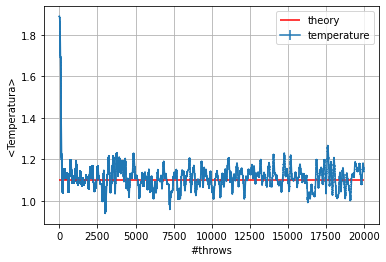

In [4]:
x,temp,err = np.loadtxt("../Lezione4/data/outputeq_temp_liquid.dat", usecols=(0,1,3), unpack='true')

plt.errorbar(x,temp,yerr=err,label="temperature")
plt.hlines(1.1,0,20000,color ="red",label="theory")
plt.xlabel('#throws')
plt.ylabel('<Temperatura>')
plt.legend()
plt.grid(True)
plt.show()


After 5k throws the Temperature same to be equilibrate. Actually, average temperature and theory temperature, after tk throws is under 1%.
I set the temperature to equilibrate equal at 1.888815

In [5]:
abs(np.mean(temp[5000:])-1.1)

0.007427385399999764

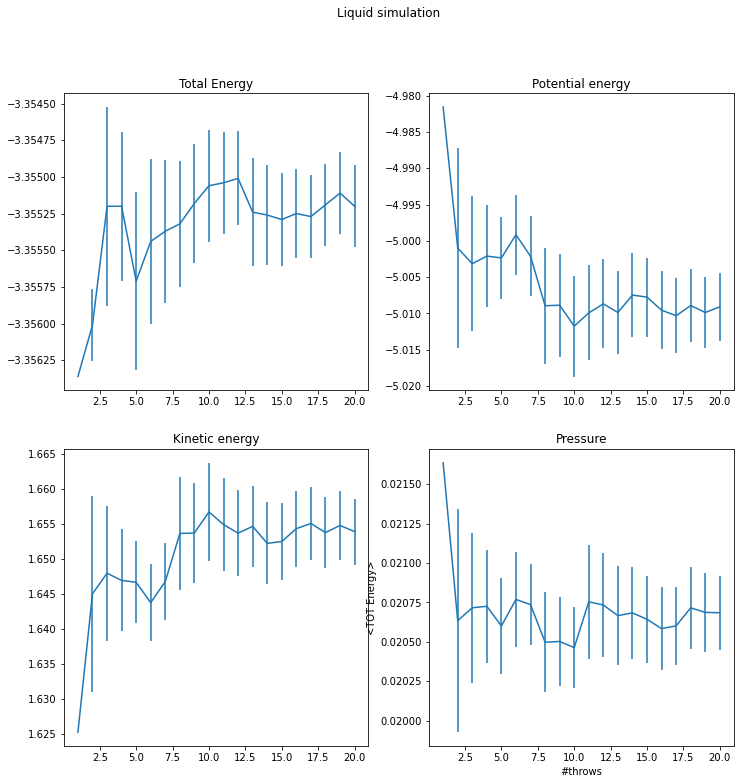

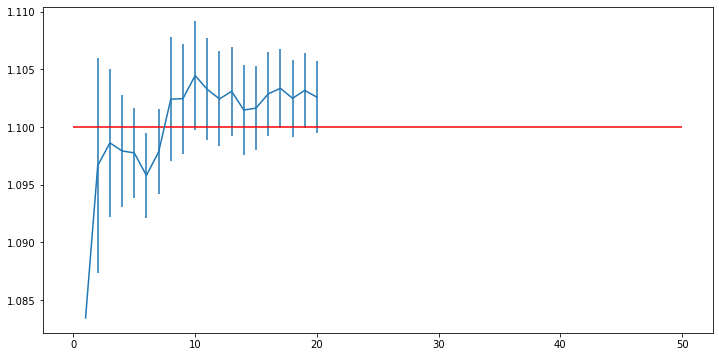

In [6]:
file_name =["etot","epot","ekin","pres","temp"]
labels = ["Total Energy","Potential energy","Kinetic energy","Pressure","Temperature"]
fig, axs = plt.subplots(2, 2,figsize=(12,12))

x = []; s = []; err = []
for count in range(5):
    xt,st,errt = np.loadtxt(f"../Lezione4/data/output_{file_name[count]}_liquid.dat", usecols=(0,2,3), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.errorbar(x[count],s[count],yerr=err[count])
        a.set_title(f'{labels[count]}')
        count = count+1
plt.xlabel('#throws')
plt.ylabel('<TOT Energy>')

fig_t, ax_t = plt.subplots(figsize=(12,6))
ax_t.errorbar(x[4],s[4],yerr= err[4])
ax_t.hlines(1.1,0,50,color ="red",label="theory")
fig.suptitle('Liquid simulation')

plt.show()

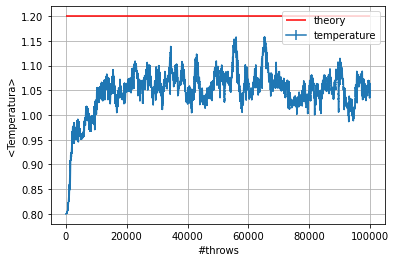

In [7]:
x,temp,err = np.loadtxt("../Lezione4/data/outputeq_temp_gas.dat", usecols=(0,1,3), unpack='true')

plt.errorbar(x,temp,yerr=err,label="temperature")
plt.hlines(1.2,0,100000,color ="red",label="theory")
plt.xlabel('#throws')
plt.ylabel('<Temperatura>')
plt.legend()
plt.grid(True)
plt.show()


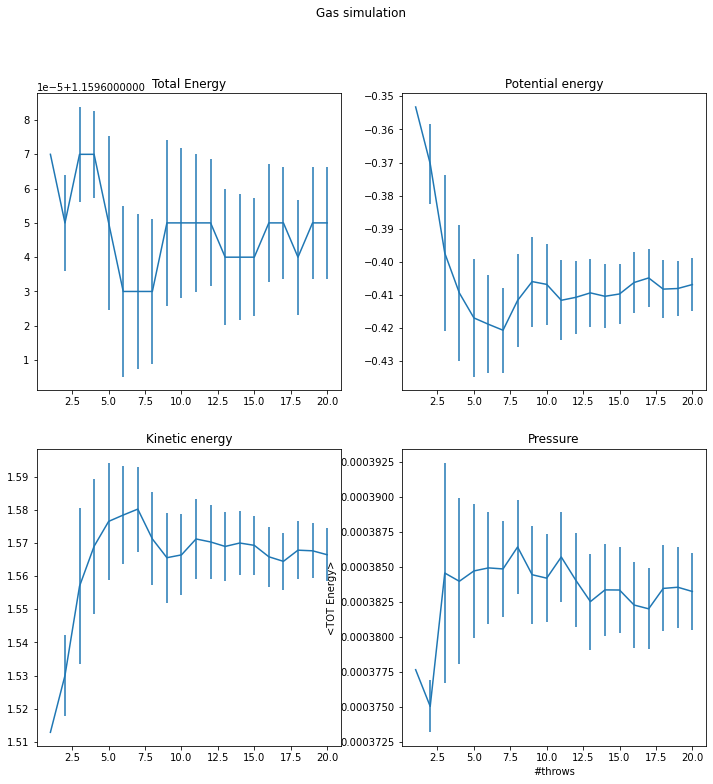

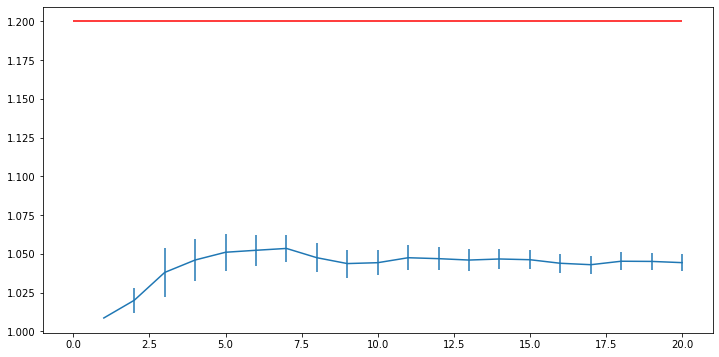

In [8]:
file_name =["etot","epot","ekin","pres","temp"]
labels = ["Total Energy","Potential energy","Kinetic energy","Pressure","Temperature"]
fig, axs = plt.subplots(2, 2,figsize=(12,12))

x = []; s = []; err = []
for count in range(5):
    xt,st,errt = np.loadtxt(f"../Lezione4/data/output_{file_name[count]}_gas.dat", usecols=(0,2,3), unpack='true')
    s.append(st)
    err.append(errt)
    x.append(xt)
    
count = 0
for ax in axs:
    for a in ax:
        a.errorbar(x[count],s[count],yerr=err[count])
        a.set_title(f'{labels[count]}')
        count = count+1
plt.xlabel('#throws')
plt.ylabel('<TOT Energy>')

fig_t, ax_t = plt.subplots(figsize=(12,6))
ax_t.errorbar(x[4],s[4],yerr= err[4])
ax_t.hlines(1.2,0,20,color ="red",label="theory")
fig.suptitle('Gas simulation')

plt.show()

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

Bisogna trovare la temperatura ideale a cui farlo partire

20 blocchi da 5k